Wall time: 1.56 ms
Wall time: 4.23 ms
101.02727387087945
Wall time: 6.05 ms


<function matplotlib.pyplot.show(*args, **kw)>

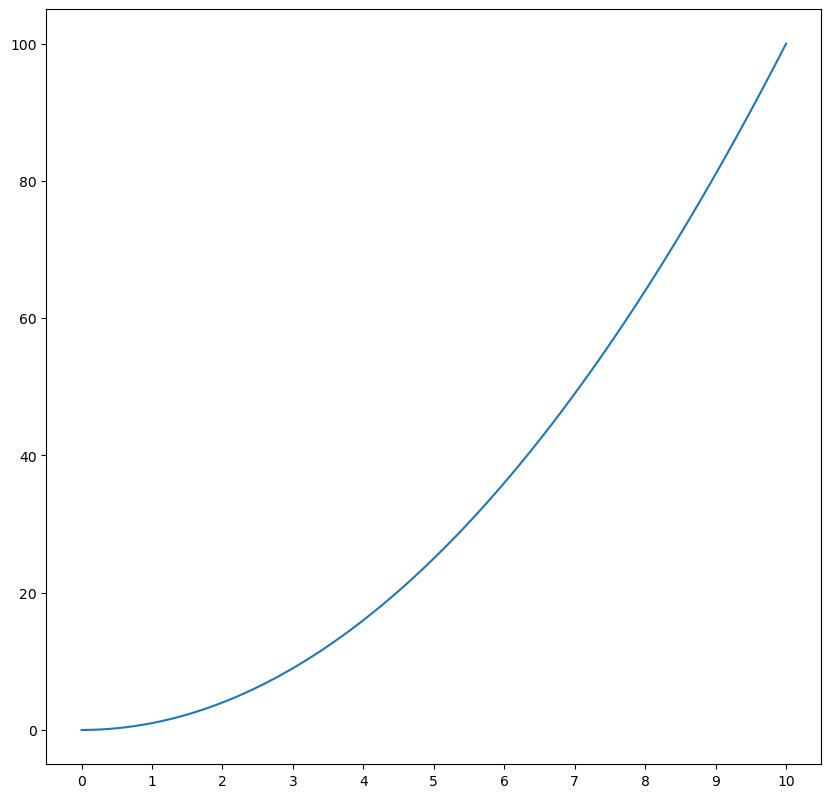

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def Compound_Sinpson(x,h,f):
    result = 0.0
    n = len(x) - 1
    for i in range(n):
        result += f(x[i]) + 4*f(x[i] + h/2) + f(x[i+1])
    result *= h/6
    return result

def arc_length(x,h,f):
    result = 0.0
    n = len(x) - 1
    for i in range(1,n):
        result += (h**2 + (f(x[i]) - f(x[i-1]))**2)**0.5
    return result

def f(x):
    return x**2

plt.figure(figsize = (10,10),dpi = 100)
_xticks_lables = [i for i in range(11)]
plt.xticks(_xticks_lables)

h = 0.001
%time x = [i for i in np.arange(0,10+h,h)]
%time y = [f(i) for i in x]
#%time result = Compound_Sinpson(x,h,f)
result = arc_length(x,h,f)
print(result)
%time plt.plot(x,y)
plt.show

[0.35714286 0.6        0.42857143]
[-4.31428571 -1.71170667 -2.42857143]
[[2.         0.64285714 0.        ]
 [0.6        2.         0.4       ]
 [0.         0.42857143 2.        ]]
[ 0.         -2.16989472  0.03967248 -1.22278696  0.        ]
0.25 < x < 0.3
-7.23298241454242*x**3 + 5.42473681090681*x**2 - 0.384101746690347*x + 0.369994736218136
0.3 < x < 0.39
4.0917911114036*x**3 - 4.76755936244461*x**2 + 2.67358710531508*x + 0.0642258510175939
0.39 < x < 0.45
-3.50683176359488*x**3 + 4.12282940130362*x**2 - 0.832538512546731*x + 0.530129421339629
0.45 < x < 0.53
2.54747283145611*x**3 - 4.05048180201522*x**2 + 2.84545152894675*x - 0.0215690848843927


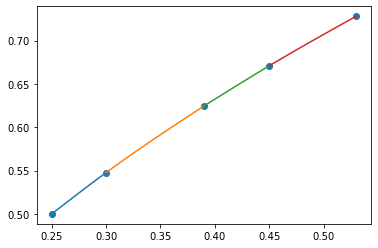

In [5]:
#三次样条插值
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x = np.array([0.25,0.30,0.39,0.45,0.53])
y = np.array([0.5000,0.5477,0.6245,0.6708,0.7280])
n = len(x) - 1
h = np.zeros(n)    #返回来一个给定形状和类型的用0填充的数组

for i in range(1,n+1):
    h[i-1] = x[i] - x[i-1]
    
u = np.zeros(n-1)
l = np.zeros(n-1)
for i in range(1,n):
    u[i-1] = h[i-1] /(h[i-1]+h[i])
    l[i-1] = 1 - u[i-1]
print(u)

d = np.zeros(n)
for i in range(2):
    j = n
    while j > i:
        if i == 0:
            d[j-1] = ((y[j]-y[j-1])/(x[j]-x[j-1]))
        else:
            d[j-1] = (d[j-1]-d[j-2])/(x[j]-x[j-1-i])
        j-=1
d[0] = d[0] - u[0]*(-2)
d[2] = d[2] - l[1]*(-0.6479)
d1 = np.zeros(n-1)
for i in range(n-1):
    d1[i] = 6*d[i+1]
print(d1)

A = np.zeros([n-1,n-1])
for i in range (1,n-2):
    A[i,i-1] = u[i]
    A[i,i] = 2
    A[i,i+1] = l[i]
A[0,0] = A[2,2] = 2
A[0,1] = l[0]
A[2,1] = u[2]
print(A)
M0 = np.array(n-1)
M0 = np.linalg.solve(A,d1)
M = np.zeros(n+1)



for i in range(1,n):
   M[i]=M0[i-1]
print(M)

F=[0,0,0,0]
m=symbols('x')
for i in range(1,n+1):
    S=M[i-1]*((x[i]-m)**3)/(6*h[i-1])+M[i]*((m-x[i-1])**3)/(6*h[i-1])+(y[i-1]-(h[i-1]**2)*M[i-1]/6)*(x[i]-m)/h[i-1]+(y[i]-(h[i-1]**2)*M[i]/6)*(m-x[i-1])/h[i-1]
    F[i-1]=expand(S)
    print(x[i-1],'<',m,'<',x[i])     
    print(F[i-1])

#画图

x1=np.linspace(0.25,0.3,100)
y1=-7.23298241454242*x1**3 + 5.42473681090681*x1**2 - 0.384101746690347*x1 + 0.369994736218136
x2=np.linspace(0.3,0.39,100)
y2=4.0917911114036*x2**3 - 4.76755936244461*x2**2 + 2.67358710531508*x2 + 0.0642258510175939
x3=np.linspace(0.39,0.45,100)
y3=-3.50683176359488*x3**3 + 4.12282940130362*x3**2 - 0.832538512546731*x3 + 0.530129421339629
x4=np.linspace(0.45,0.53,100)
y4=2.54747283145611*x4**3 - 4.05048180201522*x4**2 + 2.84545152894675*x4 - 0.0215690848843927

plt.scatter(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)

plt.show()

In [7]:
a=10
b=[i for i in range(3)]
if (a and b):
    print('都不为零0')
else:
    print('至少有一个为零0')

都不为零0


In [8]:
import random as rd

for i in range(10):
    index = i
    a = rd.randint(0,2)
    #print(a)
    b = rd.randint(0,3)
    #for i in range(10):
    if (a or b):
        #注意此处外%前不加逗号
        print('第%d次随机中至少有一个不为零'% (index))
    else:
        print('第%d次循环中都是零'%(index))

第0次随机中至少有一个不为零
第1次循环中都是零
第2次循环中都是零
第3次随机中至少有一个不为零
第4次随机中至少有一个不为零
第5次随机中至少有一个不为零
第6次随机中至少有一个不为零
第7次随机中至少有一个不为零
第8次随机中至少有一个不为零
第9次随机中至少有一个不为零


In [9]:
a = [1,2,3,4]
b = a
b is a

True

In [10]:
b==a

True

In [11]:
b = a[1:2]
b==a

False

In [12]:
b=a[:]
b==a

True

In [13]:
a=20
b=10
c=4
d=66
e=8
h=a+b-c+d*e
print(h)

554


In [14]:
h = a/b/c/d/e
print(h)

0.000946969696969697


In [15]:
h=a*b*d*e
print(h)

105600


In [16]:
x = True
y = False
z = False
if x or y and z:
    print('yes 100')
else:
    print('no  100行了哦')

yes 100


In [17]:
a = "hello"
b = 'python'
print('a+b')
print(a+b)
print(a*3)
print(a+'\n'+a)
print('a+\n+b')

a+b
hellopython
hellohellohello
hello
hello
a+
+b


In [18]:
print(a[1:3])
print(a[3])
if ('h' in a):
    print('h在集合a中')
else:
    print("h不在a中")

el
l
h在集合a中


In [19]:
print(b[0:4])
print(b[4])
if ("H" in a):
    print("H在集合a中")
else:
    print("H不在集合a中")

pyth
o
H不在集合a中


In [20]:
name = "小雨"
old = 23
word = "hello"
print('%s,我叫%s,今年%d岁了'%(word,name,old))

hello,我叫小雨,今年23岁了


In [21]:
para_str = """
这是
学的
多行
字符串
TAB(\t)
也可以(\n)

"""
print(para_str)
print("多行字符串示例")


这是
学的
多行
字符串
TAB(	)
也可以(
)


多行字符串示例


In [22]:
name = "comi"
"hello%s"%name
'hello {name}'
f'hello {name}'
r"hello {name}"

'hello {name}'

In [23]:
'hello {name}'

'hello {name}'

In [24]:
f'hello{name}'

'hellocomi'

In [25]:
r"hello{name}"

'hello{name}'

In [26]:
w = {'name':"comi","url":f"www.{name}.com"}
print(f'{w["name"]}:{w["url"]}')
f'{w["name"]}:{w["url"]}'

comi:www.comi.com


'comi:www.comi.com'

In [27]:
list = ['r','g','b','p','y']
print(list[0])
print(list[1])
print(list[2])
print(list[-1])

r
g
b
y


In [1]:
# 正则表达式练习
# Internet URL
import re
pattern = re.compile(r'^(https?:\/\/)?([\da-z.-]+)\.([a-z.]{2,6})([\/\w .-])\/?$')
def is_url(url):
    if pattern.match(url):
        print("这是一个有效的InternetURL:",url)
    else:
        print("这是一个无效的InternetURL:", url)

is_url("3.com.-")
is_url("thisisaurl")
is_url("www.baidutaobao.com")

# 匹配首尾空白字符的正则表达式
pattern = re.compile(r'^\s|\s$')
def has_blank(blank):
    if pattern.search(blank):
        print("前或后有空白字符",blank)
    else:
        print("前或后都没有空白字符",blank)

has_blank("<span>01</span>")
has_blank(" text ")
has_blank(" string")

# 账号是否合法
pattern = re.compile(r'^[a-zA-Z][a-zA-Z0-9_]{4,15}$')
def is_user(username):
    if pattern.search(username):
        print("这是一个有效的账户名：",username)
    else:
        print("这是一个无效的账户名：",username)

is_user("01_kuaixue")
is_user("huawei-0912")
is_user("xuetang_01")

# 一年的12月
pattern = re.compile(r'^(0?[1-9]|1[0-2])$')
def is_month(month):
    if pattern.match(month):
        print("这是一个有效的月份：",month)
    else:
        print("这是一个无效的月份：",month)

is_month("03")
is_month("2")
is_month("18")

# 18位身份证号码(可识别出生年月日是否正常)
pattern = re.compile(r'^(\d{6})(19[5-9][0-9]|20[0-1][0-9]|2020)(0[1-9]|1[0-2])([0-2][0-9]|3[0-1])(\d{3}([0-9xX]))$')
def is_idcard(idcard):
    if pattern.match(idcard):
        print("这是一个有效的身份证号码：",idcard)
    else:
        print("这是一个无效的身份证号码：",idcard)

is_idcard("411624200502321815")
is_idcard("411624200513191815")
is_idcard("45986620200215187X")

这是一个有效的InternetURL: 3.com.-
这是一个无效的InternetURL: thisisaurl
这是一个有效的InternetURL: www.baidutaobao.com
前或后都没有空白字符 <span>01</span>
前或后有空白字符  text 
前或后有空白字符  string
这是一个无效的账户名： 01_kuaixue
这是一个无效的账户名： huawei-0912
这是一个有效的账户名： xuetang_01
这是一个有效的月份： 03
这是一个有效的月份： 2
这是一个无效的月份： 18
这是一个无效的身份证号码： 411624200502321815
这是一个无效的身份证号码： 411624200513191815
这是一个有效的身份证号码： 45986620200215187X


In [2]:
# 简单爬取网页上的一段文字

import requests
from bs4 import BeautifulSoup

link = "https://so.gushiwen.org/mingju/juv_7c9202538459.aspx"
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.193 Safari/537.36'}

r = requests.get(link, headers = headers)

soup = BeautifulSoup(r.text,"lxml")
content = soup.find("div",class_="contson").text.strip()
print(content)
print("-----------------------------------")

# 爬取练习
out_ = []
link = "https://www.gushiwen.org/shiju/"
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.193 Safari/537.36'}

r = requests.get(link, headers = headers)

soup = BeautifulSoup(r.text,"lxml")
content = soup.find_all("div",class_="cont")
for each in content:
    out = each.a.text.strip()
    out_.append(out)
print(out_)
print("-----------------------------------")

# 连续爬取多页内容上想要的文字
doc = open("古诗文.txt", "w+",encoding='utf-8')

for i in range(1,11):

    link = "https://so.gushiwen.cn/mingjus/default.aspx?page=" + str(i) + "&tstr=&astr=&cstr=&xstr="
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
                            ' AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 '
                            'Safari/537.36'}

    r = requests.get(link, headers = headers)
    content_list = []

    soup = BeautifulSoup(r.text,"lxml")
    title = soup.find_all("div",class_ = "cont")
    for each in title[1:51]:
        content = each.text.strip()
        print(content,'\n')
        print(content,'\n',file=doc)

doc.close()
print("-----------------------------------")

# 动态页面的爬取
import json

for page in range(1,5):
    link1 = "https://api-zero.livere.com/v1/comments/list?callback=jQuery1124023920943234792968_1606811653945&limit=10&offset="
    link2 = "&repSeq=4272904&requestPath=%2Fv1%2Fcomments%2Flist&consumerSeq=1020&livereSeq=28583&smartloginSeq=5154&code=&_=1606811653951"
    page_str = str(page)
    link = link1 + page_str +link2
    print(link)

def single_page_comment(link):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64)AppleWebKit/537.36 '
                            '(KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'}
    r = requests.get(link, headers = headers)
    json_string = r.text
    json_string = json_string[json_string.find('{'):-2]
    json_data = json.loads(json_string)
    comment_list = json_data['results']['parents']
    for eachone in comment_list:
        message = eachone['content']
        print(message)

single_page_comment(link)

十年生死两茫茫，不思量，自难忘。千里孤坟，无处话凄凉。纵使相逢应不识，尘满面，鬓如霜。夜来幽梦忽还乡，小轩窗，正梳妆。相顾无言，惟有泪千行。料得年年肠断处，明月夜，短松冈。(肠断 一作：断肠)
-----------------------------------
['古诗文网', '山有木兮木有枝，心悦君兮君不知。', '人生若只如初见，何事秋风悲画扇。', '十年生死两茫茫，不思量，自难忘。', '曾经沧海难为水，除却巫山不是云。', '玲珑骰子安红豆，入骨相思知不知。', '只愿君心似我心，定不负相思意。', '平生不会相思，才会相思，便害相思。', '愿得一心人，白头不相离。', '山无陵，江水为竭。冬雷震震，夏雨雪。天地合，乃敢与君绝。', '入我相思门，知我相思苦。', '去年今日此门中，人面桃花相映红。', '雨打梨花深闭门，忘了青春，误了青春。', '人面不知何处去，桃花依旧笑春风。', '疏影横斜水清浅，暗香浮动月黄昏。', '宁可枝头抱香死，何曾吹落北风中。', '桃之夭夭，灼灼其华。', '寂寞空庭春欲晚，梨花满地不开门。', '人间四月芳菲尽，山寺桃花始盛开。', '不经一番寒彻骨，怎得梅花扑鼻香。', '竹外桃花三两枝，春江水暖鸭先知。', '春宵一刻值千金，花有清香月有阴。', '今人不见古时月，今月曾经照古人。', '海上生明月，天涯共此时。', '月上柳梢头，人约黄昏后。', '二十四桥明月夜，玉人何处教吹箫？', '露从今夜白，月是故乡明。', '沧海月明珠有泪，蓝田日暖玉生烟。', '春江潮水连海平，海上明月共潮生。', '明月几时有？把酒问青天。', '云中谁寄锦书来，雁字回时，月满西楼。', '世间无限丹青手，一片伤心画不成。', '黄沙百战穿金甲，不破楼兰终不还。', '男儿何不带吴钩，收取关山五十州。', '落红不是无情物，化作春泥更护花。', '风萧萧兮易水寒，壮士一去兮不复还。', '呜呼！楚虽三户能亡秦，岂有堂堂中国空无人！', '苟利国家生死以，岂因祸福避趋之！', '夜阑卧听风吹雨，铁马冰河入梦来。', '商女不知亡国恨，隔江犹唱后庭花。', '人生自古谁无死？留取丹心照汗青。', '写景']
-----------------------------------
复值接舆醉，狂歌五柳前。
——王维《辋川闲居赠裴

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]
[[9.20410763e-01 8.42382099e-01 7.64353434e-01 6.90826424e-01
  6.17299414e-01 5.50708914e-01 4.84118414e-01 4.26160015e-01
  3.68201617e-01 3.19727321e-01 2.71253024e-01 2.32300464e-01
  1.93347904e-01 1.63279262e-01 1.33210619e-01 1.10918350e-01
  8.86260801e-02 7.27570069e-02 5.68879336e-02 4.60440669e-02
  3.52002002e-02 2.80894679e-02 2.09787357e-02 1.65058557e-02
  1.20329757e-02 9.33504812e-03 6.63712052e-03 5.07738112e-03
  3.51764172e-03 2.65378606e-03 1.78993039e-03 1.33182511e-03
  8.73719838e-04 6.41248505e-04 4.08777175e-04 2.95960209e-04
  1.83143262e-04 1.30822372e-04 7.85015623e-05 5.53309762e-05
  3.21607084e-05 2.23706986e-05 1.25818767e-05 8.64011868e-06
  4.70

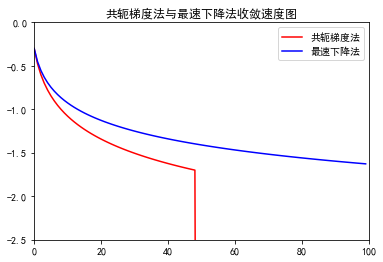

In [3]:
# 第三方库的使用
# numpy 库的使用

import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import mpl
doc = open("共轭与最速对比结果.txt","w+")
def array(n):
    A = np.zeros((n, n))
    for i in range(n):  # generate A
        for j in range(n):
            if (i == j):
                A[i, j] = -2
            if (abs(i - j) == 1):
                A[i, j] = A[j, i] = 1
    b = np.zeros((n, 1))  # generate b
    b[0,0] = -1
    b[n-1,0] = -1
    return A,b
'''共轭梯度法'''
def gonge(n,A,b):
    x = np.zeros((n, 1))  # 初始值x0
    r = b - np.dot(A, x)
    d = r  # d0=r0
    rm = [[]]
    rm.append(r)
    qm = []
    # while np.linalg.norm(np.dot(A, x) - b) / np.linalg.norm(b) >= 10 ** -6:
    for i in range(n):
        r_ = r
        a = np.dot(r.T, r) / np.dot(d.T, np.dot(A, d))
        x = x + a * d  # x(k+1)=x(k)+a(k)*d(k)
        r = b - np.dot(A, x)  # r(k+1)=b-A*x(k+1)
        rm.append(r)
        q = np.linalg.norm(np.dot(A, x) - b)/ np.linalg.norm(b)
        qm.append(q)
        if q < 10 ** -8:
            break
        else:
            beta = np.linalg.norm(r) ** 2 / np.linalg.norm(r_) ** 2
            d = r + beta * d  # d(k+1)=r(k+1)+beta(k)*d(k)
    print(x.T)
    print(x.T,file = doc)
    return qm
'''最速下降法'''
def zuisu(n,A,b):
    xs = np.zeros((n, 1))  # 初始值x0
    r = b - np.dot(A, xs)
    d = r  # d0=r0
    rn = [[]]
    rn.append(r)
    qn = []
    for j in range(n):
        a = np.dot(r.T, r) / np.dot(d.T, np.dot(A, d))
        xs = xs + a * d  # x(k+1)=x(k)+a(k)*p(k)
        r = b - np.dot(A, xs)  # r(k+1)=b-A*x(k+1)
        rn.append(r)
        q = np.linalg.norm(np.dot(A, xs) - b)/ np.linalg.norm(b)
        qn.append(q)
        if q < 10 ** -8:
            break
        else:
            d = r  # d(k+1)=r(k+1)
    print(xs.T)
    print(xs.T, file=doc)
    return qn
'''以误差的对数为y值画收敛速度'''
def draw():
    p = list(np.arange(0, M, 1))
    f = [math.log(c,10) for c in c1]
    p_ = list(np.arange(0, N, 1))
    f_ = [math.log(c, 10) for c in c2]
    plt.plot(p, f, label="共轭梯度法", color="red")
    plt.plot(p_, f_, label="最速下降法", color="blue")
    plt.title("共轭梯度法与最速下降法收敛速度图")
    plt.xlim(0, n)
    plt.ylim(-2.5, 0)
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.legend(loc="upper right")

if __name__ == "__main__":
    n = 100
    A,b = array(n)
    c1 = gonge(n,A,b)
    c2 = zuisu(n,A,b)
    M = len(c1)
    N = len(c2)
    draw()
    plt.savefig("1.png")
    plt.show()
    doc.close()